<a href="https://colab.research.google.com/github/lcbjrrr/quant/blob/master/Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Analise de sobreviventes do Titanic



## SUMARIZACAO

In [ ]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


survival        Sobreviveu ao acidente? (0 = Não; 1 = Sim)

pclass          Classe do passageiro (1 = primeira classe; 2 = segunda classe; 3 = terceira classe)

name            Nome

sex             Gênero

age             Idade

sibsp           Soma do número irmãos + cunhados + cônjuge

parch           Soma do número pais + filhos

ticket          Número da passagem

fare            Valor da passagem

cabin           Número da cabine

embarked        Porto de embarque (C = Cherbourg; Q = Queenstown; S = Southampton)

Obs: Atente que a informacao de Cabine esta presente em menos de 25% dos registros

In [ ]:
import pandas as pd
titanic = pd.read_csv('http://quant-ibmec.group/data/titanic.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**Genero por Classe**

In [ ]:
# Separar homens e mulheres
tit_homens = titanic[titanic['Sex']=='male']
print('Total Homens',len(tit_homens))
tit_mulheres = titanic[titanic['Sex']=='female']
print('Total Mulheres',len(tit_mulheres))

('Total Homens', 577)
('Total Mulheres', 314)


In [ ]:
homens_por_classe = tit_homens.groupby('Pclass').count()['PassengerId']
mulheres_por_classe = tit_mulheres.groupby('Pclass').count()['PassengerId']
genero_por_classe=pd.DataFrame({
    'Homens':homens_por_classe,
    'Muleheres':mulheres_por_classe
})
genero_por_classe

,Homens,Muleheres
Pclass,,
1,122,94
2,108,76
3,347,144


Nota-se uma proporcao de homens muito maior com relacao a mulheres na 3a classe. Existe a premissa de mulheres e criancas sao socorridas primeiro em um acidente maritimo, assim nossa analise de genero parece ter sendido. E como obter a informacao de crianca?

**Identificando Criancas**

In [ ]:
# Criar uma coluna ser maior de idade, True ou False
titanic['maior_de_idade'] = titanic['Age'] > 16 
# Separar maiores de idade
menores_de_idade = titanic[titanic['maior_de_idade']==False]
# Criar um coluna Pessoa, se menor de idade, registrar como crianca
menores_de_idade['Pessoa'] = 'crianca'
# Separar maiores de idade
maiores_de_idade = titanic[titanic['maior_de_idade']==True]
# Para os maiores, registrar o genero na coluna Pessoa
maiores_de_idade['Pessoa'] = maiores_de_idade['Sex'] 
# Rejuntar o DataFrame
titanic = pd.concat([menores_de_idade,maiores_de_idade])
mulher_ou_homem = maiores_de_idade.groupby('Sex').count()['PassengerId']
print('Criancas', len(menores_de_idade))
print(mulher_ou_homem)


('Criancas', 277)
Sex
female    212
male      402
Name: PassengerId, dtype: int64


/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [ ]:
# Separar por classe
classe_1 = titanic[titanic['Pclass']==1]
classe_2 = titanic[titanic['Pclass']==2]
classe_3 = titanic[titanic['Pclass']==3]
# Agrupar por homem, mulher ou crianca
pessoa_por_1aclasse = classe_1.groupby('Pessoa').count()['PassengerId']
pessoa_por_2aclasse = classe_2.groupby('Pessoa').count()['PassengerId']
pessoa_por_3aclasse = classe_3.groupby('Pessoa').count()['PassengerId']
pessoa_por_classe = pd.DataFrame({'1a Classe': pessoa_por_1aclasse,
                                 '2a Classe': pessoa_por_2aclasse,
                                 '3a Classe': pessoa_por_3aclasse})
pessoa_por_classe

,1a Classe,2a Classe,3a Classe
Pessoa,,,
crianca,39,32,206
female,79,64,69
male,98,88,216


Diferentemente do que talvez se espera-se, um numero muito grande de criancas. Possivelmente em 1912, a familias nao despendiam grandes gastos com suas criancas.

**Sobreviventes por Classe e tipo de Pessoa**

In [ ]:
# Soma da quantidade de sobrevivente por Classe:
sobreviventes_1aclasse = classe_1.groupby('Pessoa').sum()['Survived']
sobreviventes_2aclasse = classe_2.groupby('Pessoa').sum()['Survived']
sobreviventes_3aclasse = classe_3.groupby('Pessoa').sum()['Survived']
sobreviventes_por_classe = pd.DataFrame({ '1a Classe': sobreviventes_1aclasse/pessoa_por_1aclasse,
                                          '2a Classe': sobreviventes_2aclasse/pessoa_por_2aclasse,
                                          '3a Classe': sobreviventes_3aclasse/pessoa_por_3aclasse})
sobreviventes_por_classe

,1a Classe,2a Classe,3a Classe
Pessoa,,,
crianca,0.564103,0.718750,0.300971
female,0.974684,0.906250,0.420290
male,0.377551,0.068182,0.129630


Mulheres da 1a e 2a classe com uma taxa de sobrevivencia superior a 90%. Ao olharmos para 3a classe essa taxa cai por menos da metade. Vamos ver a seguir que a diferenca de preco da 2a para 3a classe nao era tao grande. As criancas da 2a classe com uma taxa de sobrevivencia maior ate que a 1a classe. Os homens de maneira geral tiveram uma taxa de sobrevivencia baixa, e sendo das classes mais baixas, 2a e 3a, ainda pior essa taxa.

**Media de Preco por Classe**

In [ ]:
preco_por_classe = titanic.groupby('Pclass').mean()['Fare']
preco_por_classe

Pclass
1    84.154687
2    20.662183
3    13.675550
Name: Fare, dtype: float64

A 1a classe, sendo 3-4x mais cara que demais classe, dentro do esperado. A diferenca de preco entre 2a e 3a classe parece nao ser tao grande, cerca de 7 dolares. No entanto vale a atentar que a inflacao desses valores correspondem a cerca de 30x o valor ou seja estamos falando de uma diferenca de preco de 210 usd

## ANALISE GRAFICA

In [ ]:
import pandas as pd
titanic = pd.read_csv('http://quant-ibmec.group/data/titanic.csv')
titanic['maior_de_idade'] = titanic['Age'] > 16 
menores_de_idade = titanic[titanic['maior_de_idade']==False]
menores_de_idade['Pessoa'] = 'crianca'
maiores_de_idade = titanic[titanic['maior_de_idade']==True]
maiores_de_idade['Pessoa'] = maiores_de_idade['Sex'] 
titanic = pd.concat([menores_de_idade,maiores_de_idade])
mulher_ou_homem = maiores_de_idade.groupby('Sex').count()['PassengerId']
titanic.head()

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,maior_de_idade,Pessoa
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,False,crianca
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,False,crianca
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,False,crianca
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S,False,crianca
14,15,0,3,"Vestrom, Miss. Hulda Amanda Adolfina",female,14.0,0,0,350406,7.8542,NaN,S,False,crianca


**Precos Maximos e Minimos**

In [ ]:
preco_max=titanic['Fare'].max()
preco_min=titanic['Fare'].min()
print('Preco Maximo',preco_max)
print('Preco Minimo',preco_min)
sem_gratis = titanic[titanic['Fare']>0]
preco_min=sem_gratis['Fare'].min()
print('Preco Minimo sem Gratis',preco_min)


('Preco Maximo', 512.3292)
('Preco Minimo', 0.0)
('Preco Minimo sem Gratis', 4.0125)


Havaimoos ja visto o preco medio por classe. Mas a variacao eh bastante grande dentro da mesma classe. Os precos de passagem chegam a mais de 500 e algumas passagens gratuitas. Eliminando-se essas, o menor preco de passagem era de menos de 50, corrigida a inflacao, cerca de $150 usd nos dias de hoje. 

**Proporcoes de Sobervientes**

In [ ]:
sobreviventes = titanic[titanic['Survived']==1]
sobrev_por_pessoa = sobreviventes.groupby('Pessoa').count()['PassengerId']
sobrev_por_pessoa/len(sobreviventes)


Pessoa
crianca    0.312865
female     0.479532
male       0.207602
Name: PassengerId, dtype: float64

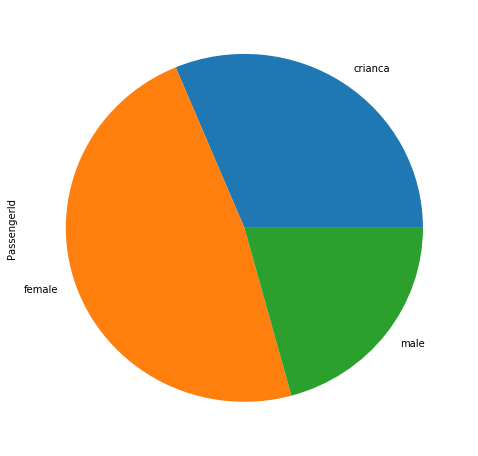

In [ ]:
sobrev_por_pessoa.plot(kind='pie',figsize=(8,8))

Visualizamos graficamente, as proporcoes das taxas de soberviventes que vimos na analise anterior. Quase 50% dos sobreviventes sao mulheres (note que isto eh diferente de que 50% da mulheres sobreviveram, veremos essa taxa na sequencia). As criancas corresponderam a 30% dos sobreviventes. E apenas 20% dos sobreviventes sao homens.

In [ ]:
tot_sobrev_por_pessoa = titanic.groupby('Pessoa').sum()['Survived']
qtd_por_pessoa =  titanic.groupby('Pessoa').count()['PassengerId']
perc_sobrev_por_pessoa = tot_sobrev_por_pessoa/qtd_por_pessoa
perc_sobrev_por_pessoa

Pessoa
crianca    0.386282
female     0.773585
male       0.176617
dtype: float64

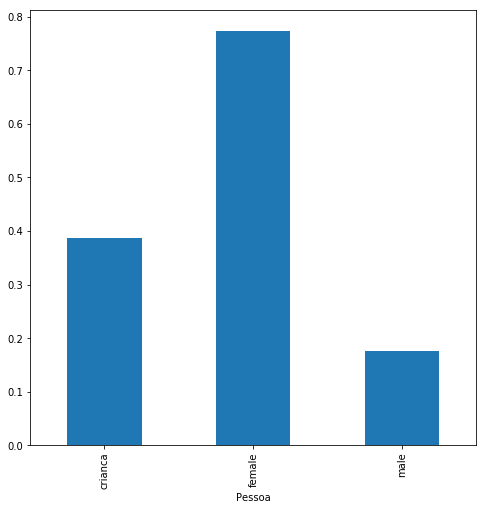

In [ ]:
perc_sobrev_por_pessoa.plot(kind='bar',figsize=(8,8))

Agora comparativamente, em um grafico de barras, temos um taxa de sobrevivencia de mulheers de quase 80%, de criancas de cerca de 40% , e menos de 20% para homens.

**Visualizando taxa de sobrevivencia graficamente**

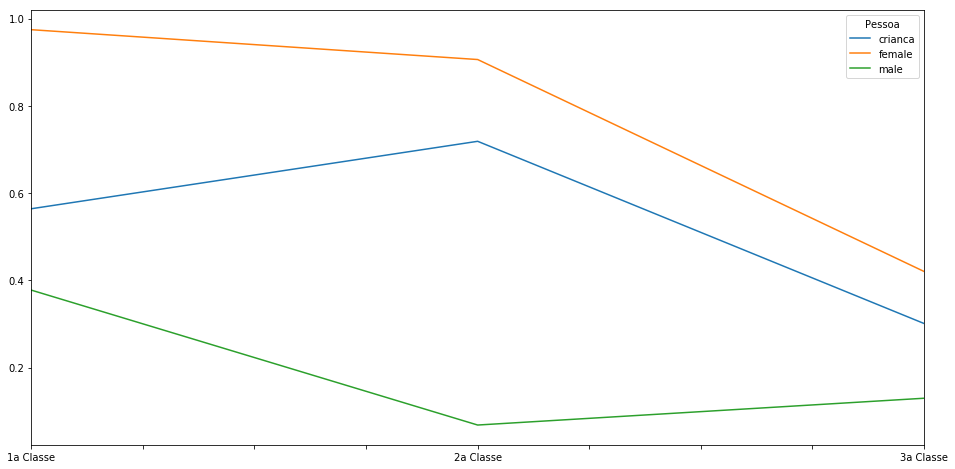

In [ ]:
classe_1 = titanic[titanic['Pclass']==1]
classe_2 = titanic[titanic['Pclass']==2]
classe_3 = titanic[titanic['Pclass']==3]
pessoa_por_1aclasse = classe_1.groupby('Pessoa').count()['PassengerId']
pessoa_por_2aclasse = classe_2.groupby('Pessoa').count()['PassengerId']
pessoa_por_3aclasse = classe_3.groupby('Pessoa').count()['PassengerId']
pessoa_por_classe = pd.DataFrame({'1a Classe': pessoa_por_1aclasse,
                                 '2a Classe': pessoa_por_2aclasse,
                                 '3a Classe': pessoa_por_3aclasse})
sobreviventes_1aclasse = classe_1.groupby('Pessoa').sum()['Survived']
sobreviventes_2aclasse = classe_2.groupby('Pessoa').sum()['Survived']
sobreviventes_3aclasse = classe_3.groupby('Pessoa').sum()['Survived']
sobreviventes_por_classe = pd.DataFrame({ '1a Classe': sobreviventes_1aclasse/pessoa_por_1aclasse,
                                          '2a Classe': sobreviventes_2aclasse/pessoa_por_2aclasse,
                                          '3a Classe': sobreviventes_3aclasse/pessoa_por_3aclasse})
sobreviventes_por_classe.T.plot(figsize=(16,8))

A informacao que havviamos visto na forma de tabela na analise anterior, visto de maneira grafica, no caso um grafico linha, percebemos a tendencia da maior probabilidade de sovivencia nas 1a e 2a classe, consequentemente a queda dessa taxa para a 3a classe. Percebe-se ainda a taxa de sobrevivencia de mulheres e criancas muito mais alta que de homens.

**Comparando Classe por Cidade de embarque**

In [ ]:
cidade_por_1aclasse = classe_1.groupby('Embarked').count()['PassengerId']
cidade_por_2aclasse = classe_2.groupby('Embarked').count()['PassengerId']
cidade_por_3aclasse = classe_3.groupby('Embarked').count()['PassengerId']
cidade_por_classe = pd.DataFrame({'1a Classe': cidade_por_1aclasse,
                                  '2a Classe': cidade_por_2aclasse,
                                  '3a Classe': cidade_por_3aclasse})
cidade_por_classe

,1a Classe,2a Classe,3a Classe
Embarked,,,
C,85,17,66
Q,2,3,72
S,127,164,353


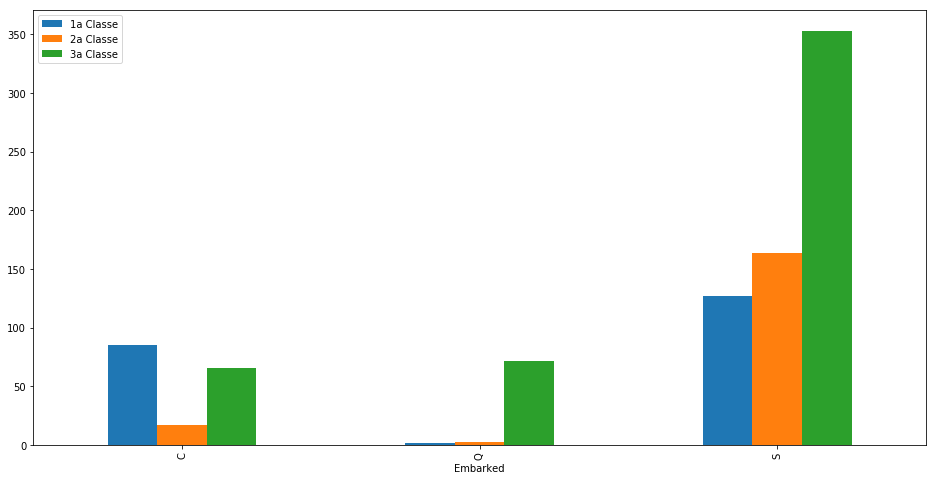

In [ ]:
cidade_por_classe.plot(kind='bar',figsize=(16,8))

Perecbe-se que proporcialmente significativo de passagens de 1a classe foram compradas por cidadaos de (C)herbourg na Franca. Ja os habitantes de (Q)ueenstown na Irlanda. E a grande maioria das passagens foi emitida em (S)outhampton na Inglaterra, seguindo a proporcao geral de classes.


**Preco por Andar/Deck da Cabine**

In [ ]:
def primeira_letra(palavra):
  letra=''
  if len(palavra)>0:
    letra=palavra[0:1]
  return letra

titanic['Andar'] = titanic['Cabin'].astype(str).apply(primeira_letra)
preco_por_andar = titanic.groupby('Andar').mean()['Fare']
preco_por_andar

Andar
A     39.623887
B    113.505764
C    100.151341
D     57.244576
E     46.026694
F     18.696792
G     13.581250
T     35.500000
n     19.157325
Name: Fare, dtype: float64

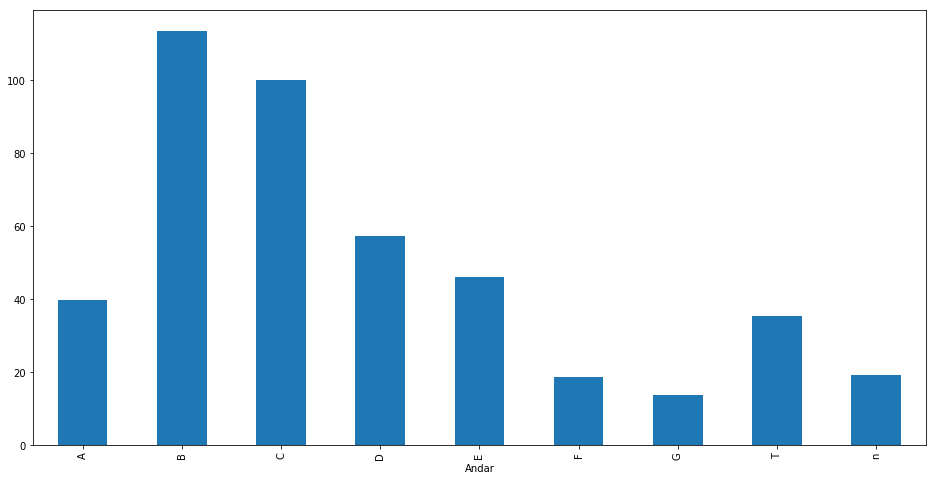

In [ ]:
preco_por_andar.plot(kind='bar',figsize=(16,8))

![foto](https://skife.org/images/2009-12-31-bulkheads_ship_bulkhead_diagram.gif)

No deck superior, A, nao havia a 1a classe, assim mesmo sendo um andar alto nao tinha um preco tao caro. As primeiras classes se localizavam nos decks B e C, assim tinham preco mais caro. E preco segue entao decaindo para os decks D, E, F e G. Obs: o codigo T eh um erro de registro da base, e o 'n' referem-se aos registos que nao disponham da informacao de cabine.

**O impacto de viajar sozinho**

In [ ]:
# O campos SibSp indica quantidade de acompanhantes que nao sao descendentes diretos, como imaos ou conjuges. E	Parch, indica descedentes diretos, como pais e filhos.
# Assim quem tem essas duas colunas como zero esta viajando sozinho.
titanic['Acompanhantes']= titanic['SibSp']+	titanic['Parch']
titanic['Sozinho'] = titanic['Acompanhantes']==0
tot_sobrev_por_sozinho = titanic.groupby('Sozinho').sum()['Survived']
qtd_por_sozinho =  titanic.groupby('Sozinho').count()['PassengerId']
per_sobrev_sozinho=tot_sobrev_por_sozinho/qtd_por_sozinho
per_sobrev_sozinho

Sozinho
False    0.505650
True     0.303538
dtype: float64

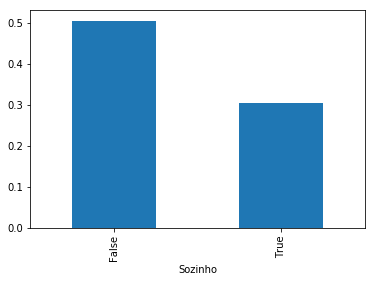

In [ ]:
per_sobrev_sozinho.plot(kind='bar')

Taxa de sobrevivencia dos passageiros sozinhos foi bem baixa, 30%, em comparacao aos acompanhados, de 50%. Seria interessante comparar com a classe da pasasgem, mas imaginaria que muitos desses estavam viajando na 3a classe. Uma outra hipotese para a maior taxa doos accompanhados seria obviamente das pessoas se ajudarem na trajedia.

In [ ]:
# ANALiSE ESTATISTICA

In [ ]:
import pandas as pd
titanic = pd.read_csv('http://quant-ibmec.group/data/titanic.csv')
titanic['maior_de_idade'] = titanic['Age'] > 16 
menores_de_idade = titanic[titanic['maior_de_idade']==False]
menores_de_idade['Pessoa'] = 'crianca'
maiores_de_idade = titanic[titanic['maior_de_idade']==True]
maiores_de_idade['Pessoa'] = maiores_de_idade['Sex'] 
titanic = pd.concat([menores_de_idade,maiores_de_idade])
mulher_ou_homem = maiores_de_idade.groupby('Sex').count()['PassengerId']
titanic.head()

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,maior_de_idade,Pessoa
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,False,crianca
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,False,crianca
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,False,crianca
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S,False,crianca
14,15,0,3,"Vestrom, Miss. Hulda Amanda Adolfina",female,14.0,0,0,350406,7.8542,NaN,S,False,crianca


**Analise de Precos**

In [ ]:
faixas_preco = [-1,4,13,20,40,84,120,200,600]
cat_preco = ['G','MB','B','M','N','A','AA','AAA']
freq_precos=pd.value_counts(pd.cut(x=titanic['Fare'],bins=faixas_preco,labels=cat_preco))
freq_precos

MB     413
M      200
N      110
B       87
A       28
AAA     20
AA      18
G       15
Name: Fare, dtype: int64

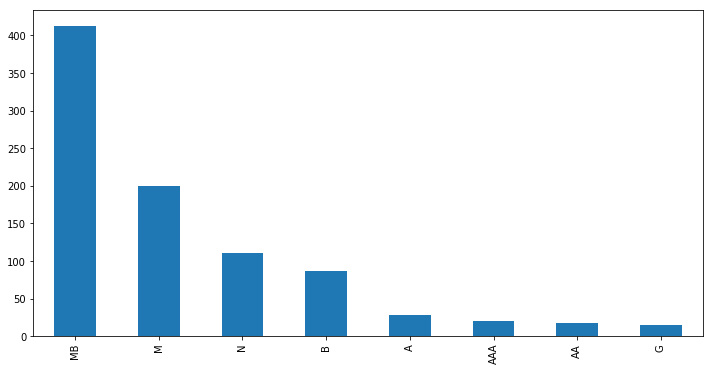

In [ ]:
freq_precos.plot(kind='bar',figsize=(12,6))

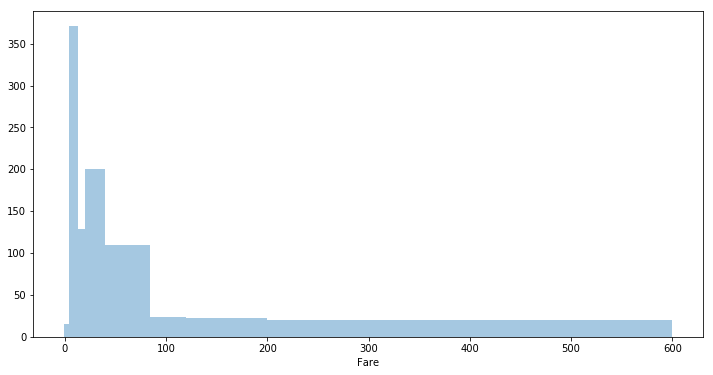

In [ ]:
import seaborn as sns
from matplotlib import pyplot as plt 
plt.figure(figsize=(12,6))
sns.distplot(titanic['Fare'],bins=faixas_preco,kde=False)

Pelas analises anteriores vale lembrar que temos passagens Gratuitas, a 3a classe com media de preco de 13, a 2a de 20 e 84 para a 1a. Temos entao um total de 15 passagens gratuitas. A grande maioria, quase 50% da passagens como sendo Muito Baixo prerco, entre 4 e 13 usd (preco medio da 3a classe). Assim, vemos um histograma totalmente enviesado para a esquerda, totalmente concentrado nos precos inferiores

In [ ]:
titanic['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

Com a analise de quartis vemos algumas informacoes ja apresentadas anteriormente, temos preco minino igual a zero, ou seja alguma passagens foram gratis. 25% da passagens custavam menos de 7 usd (210 em valores de hoje). Metade das passagens custavam aproximadamente menos que o preco medio da 3a classe, ou seja, grande parte das pessoas viajavam na 3a classe na cabines mais baratas desta. Os passageiros que pagaram mais de 31 usd (900 usd, em valor de hoje, aproximadamente o valor de um iphone nos EUA) estavam no top 25% da cabines mais caras. E preco chegava ao maximo de mais de 500 usd, equivalente a 15 mil usd nos dias de hoje!

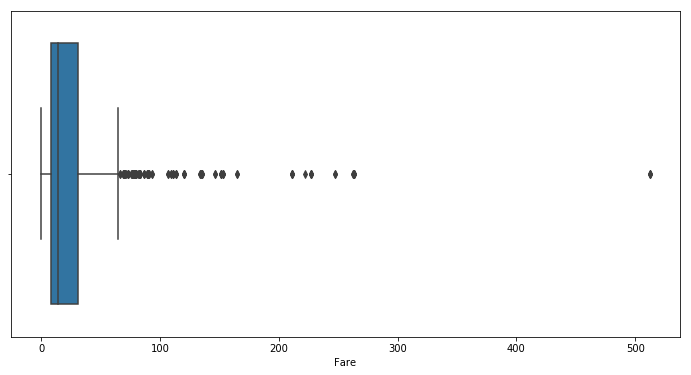

In [ ]:
plt.figure(figsize=(12,6))
sns.boxplot(x='Fare',data=titanic)

Como esperado, temos uma alta concentracao de valores no primeiro quartil. E um numero muito grande de outliers, qualquer valor acima de 80 usd, aproximadamente o preco medio da 1a classe, eh considerado um ponto fora da curva. 

5.0

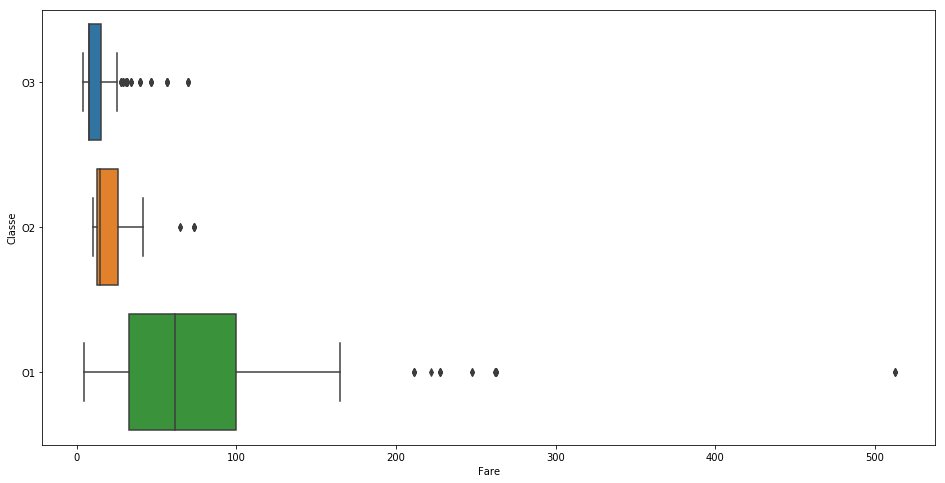

In [ ]:
# Conveter o numero da classe de inteiro para texto, configurando ela como categorica
titanic['Classe'] = "O"+titanic['Pclass'].astype(str)
sem_gratis = titanic[titanic['Fare']>0]
plt.figure(figsize=(16,8))
sns.boxplot(x='Fare',y='Classe',data=sem_gratis)
sem_gratis[sem_gratis['Pclass']==1]['Fare'].min()

Vemos que a 3a classe como alta concentracao de precos abaixo do seu preco medio, 7 usd. Interessante ver pontos fora da curva da 3a classe, como sendo mais caro que muitas passgens da 1a classe, chegando a quase 100 usd. A 2a classe massivamente concentrada abaixo do seu preco medio, 20 usd. Por fim, a 1a classe, interessante tinha precos comecando em 5 usd. Mas no geral o preco bem distribuido em volta da sua media 80 usd. E valores acima de 180 (cerca de 500 usd em valores de hoje) sao o top 1% do preco de passagens

**Analise de Sobreviventes**

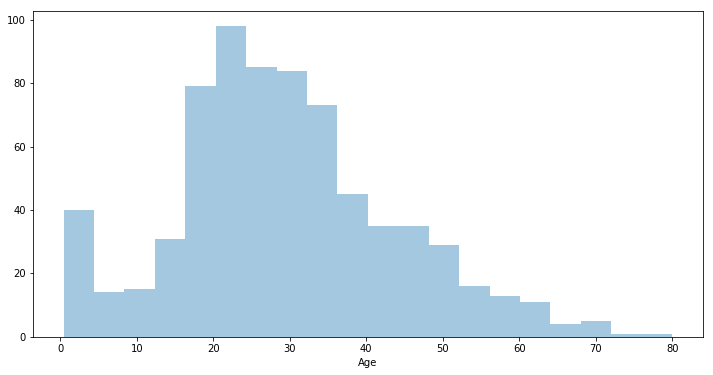

In [ ]:
# Filtrando a base por registros com informacao correta de idade
titanic_ok = titanic[titanic['Age']>0]
plt.figure(figsize=(12,6))
sns.distplot(titanic_ok['Age'],kde=False)

In [ ]:
titanic_ok['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

Idade media dos passageiros jovens, cerca de 28-29 anos. Bem distruidos entre mais novos que essa idade e mais velhos que estes. Com um numero grande de criancas com menos de 10 anos, cerca de 60. E grande variedade passageiros de mais idade, com 30, 40, 50, 60, 70, e ate 80 anos de idade.

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


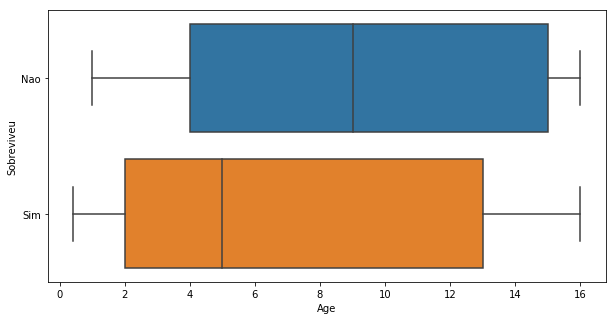

In [ ]:
titanic_ok['Sobreviveu'] = titanic_ok['Survived'].map({0:'Nao',1:'Sim'})
criancas=titanic_ok[titanic_ok['Pessoa']=='crianca']
homens=titanic_ok[titanic_ok['Pessoa']=='male']
mulheres=titanic_ok[titanic_ok['Pessoa']=='female']
plt.figure(figsize=(10,5))
sns.boxplot(x='Age',y='Sobreviveu',data=criancas)

Interessante perceber que a maior parte das criancas sobreviventes tem idade baixas, muita delas entre 2 e 4 anos.

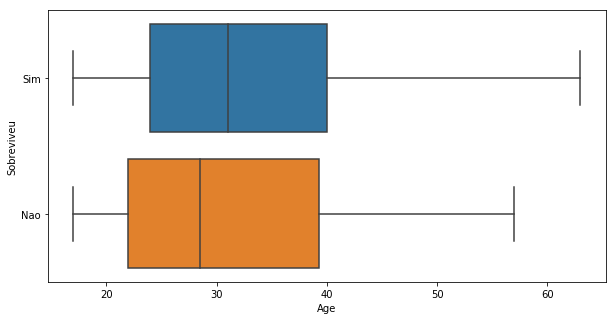

In [ ]:
plt.figure(figsize=(10,5))
sns.boxplot(x='Age',y='Sobreviveu',data=mulheres)

Interessante tambem que a mulheres mais velhas tiveram uma taxa de sobervivencia maior. Ate senhoras com mais de 65 anos chegaram a sobreviver.

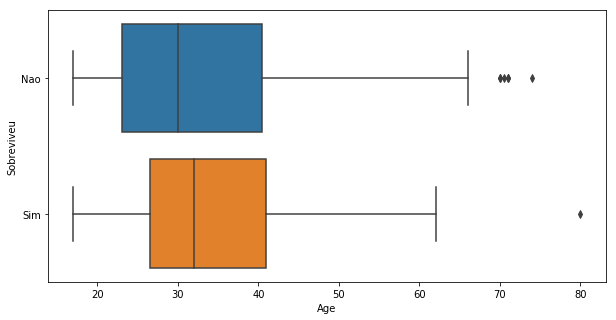

In [ ]:
plt.figure(figsize=(10,5))
sns.boxplot(x='Age',y='Sobreviveu',data=homens)

Nos homens talvez um resultado mais esperado, os mais jovens, com menos de 30 anos tiveram uma taxa de sobrevivencia maior. O que chama a atencao eh o sobrevivente de 80 anos. Que podemos ate identifica-lo o [Sr. Algernon](https://www.encyclopedia-titanica.org/titanic-survivor/algernon-barkworth.html)